### **Loading Data:**

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

print("Loading the dataset...")
try:
    data = pd.read_csv('/content/owid-covid-data.csv')
    print("Data loaded successfully.")
    display(data.head())  # Display the DataFrame
except Exception as e:
    print(f"Error loading data: {e}")


Loading the dataset...
Data loaded successfully.


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


### **Preprocessing Data:**

In [ ]:
print("Preprocessing data...")
try:
    # Filtering data for a specific country (e.g., Afghanistan)
    afghanistan_data = data[data['location'] == 'Afghanistan'][['date', 'total_cases']].dropna()
    afghanistan_data['date'] = pd.to_datetime(afghanistan_data['date'])
    afghanistan_data = afghanistan_data.set_index('date')

    print("Data preprocessed successfully.")
    display(afghanistan_data.head())  # Display the DataFrame
except Exception as e:
    print(f"Error preprocessing data: {e}")


Preprocessing data...
Data preprocessed successfully.


,total_cases
date,
2020-03-01,1.0
2020-03-02,1.0
2020-03-03,1.0
2020-03-04,1.0
2020-03-05,1.0


### **Data Augmentation**

In [ ]:
print("Performing data augmentation...")
try:
    augmented_cases = afghanistan_data['total_cases'].copy()
    # Creating synthetic data by adding a small trend to the original data
    trend = np.linspace(0, 5000, len(augmented_cases))
    augmented_cases = augmented_cases + trend
    afghanistan_data['Augmented_Cases'] = augmented_cases

    print("Data augmentation completed successfully.")
    display(afghanistan_data.head())  # Display the DataFrame
except Exception as e:
    print(f"Error in data augmentation: {e}")


Performing data augmentation...
Data augmentation completed successfully.


,total_cases,Augmented_Cases
date,,
2020-03-01,1.0,1.00000
2020-03-02,1.0,4.27654
2020-03-03,1.0,7.55308
2020-03-04,1.0,10.82962
2020-03-05,1.0,14.10616


### **SARIMA Model Implementation with Hyperparameter Tuning and Optimization**

In [ ]:
import statsmodels.api as sm
import itertools

print("Implementing SARIMA model with hyperparameter tuning and optimization...")
try:
    # Define a smaller range for p, d, and q parameters
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

    best_aic = float("inf")
    best_pdq = None
    best_seasonal_pdq = None
    best_model = None

    for param in pdq:
        for seasonal_param in seasonal_pdq:
            try:
                temp_model = sm.tsa.SARIMAX(afghanistan_data['Augmented_Cases'], order=param, seasonal_order=seasonal_param)
                results = temp_model.fit(disp=False)
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_pdq = param
                    best_seasonal_pdq = seasonal_param
                    best_model = results
            except Exception as e:
                continue

    print(f'Best SARIMA parameters: {best_pdq} x {best_seasonal_pdq} - AIC: {best_aic}')
except Exception as e:
    print(f"Error implementing SARIMA model: {e}")


Implementing SARIMA model with hyperparameter tuning and optimization...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Best SARIMA parameters: (0, 0, 0) x (1, 0, 1, 12) - AIC: 6.0


# Making predictions

In [ ]:
print("Making predictions with the SARIMA model...")
try:
    forecast = best_model.get_forecast(steps=30)
    mean_forecast = forecast.predicted_mean

    print("Predictions made successfully.")
    display(mean_forecast.head())  # Display the DataFrame
except Exception as e:
    print(f"Error making predictions: {e}")

Making predictions with the SARIMA model...
Predictions made successfully.


2024-05-06    0.0
2024-05-07    0.0
2024-05-08    0.0
2024-05-09    0.0
2024-05-10    0.0
Freq: D, Name: predicted_mean, dtype: float64

# Plotting the results

Plotting the results...


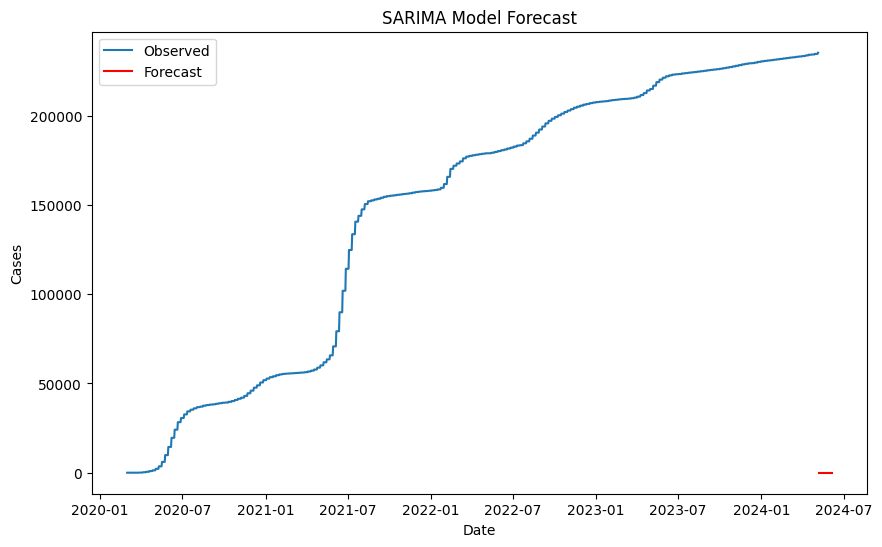

Results plotted successfully.


In [ ]:
import matplotlib.pyplot as plt

print("Plotting the results...")
try:
    plt.figure(figsize=(10, 6))
    plt.plot(afghanistan_data.index, afghanistan_data['total_cases'], label='Observed')
    plt.plot(mean_forecast.index, mean_forecast, color='red', label='Forecast')
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.title('SARIMA Model Forecast')
    plt.legend()
    plt.show()
    print("Results plotted successfully.")
except Exception as e:
    print(f"Error plotting the results: {e}")


### **Analysis**

In [ ]:
# Calculating Mean Squared Error:
from sklearn.metrics import mean_squared_error

print("Calculating Mean Squared Error...")
try:
    mse_sarima = mean_squared_error(afghanistan_data['total_cases'], best_model.predict(start=0, end=len(afghanistan_data)-1))
    print(f'Mean Squared Error with SARIMA Model: {mse_sarima}')
except Exception as e:
    print(f"Error calculating evaluation metrics: {e}")

Calculating Mean Squared Error...
Mean Squared Error with SARIMA Model: 27737783540.766865
